In [2]:
# read three pkl files and combine them into one
import pickle
import pandas as pd
import os
import logging
from pathlib import Path
from src.constants import VTCPaths

## Postprocess Annotation Files

In [ ]:
# Folder containing the pickle files
folder_path = '/home/nele_pauline_suffo/ProcessedData/annotations_superannotate/'

# List to store individual DataFrames
dataframes = []

# Iterate over all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.pkl'):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'rb') as f:
            df = pickle.load(f)
            dataframes.append(df)

# Combine all DataFrames into one
combined_df = pd.concat(dataframes, ignore_index=True)

# Store the combined DataFrame into a new pickle file
combined_df.to_pickle('/home/nele_pauline_suffo/ProcessedData/annotations_superannotate/quantex_share_annotations.pkl')


## Postprocess Prediction File

In [3]:
def rttm_to_dataframe(rttm_file: Path) -> pd.DataFrame:
    """
    This function reads the voice_type_classifier
    output rttm file and returns its content as a pandas DataFrame.

    Parameters
    ----------
    rttm_file : path
        the path to the RTTM file

    """
    logging.info(f"Reading RTTM file from: {rttm_file}")
    
    try:
        df = pd.read_csv(
            rttm_file,
            sep=" ",
            names=[
                "Speaker",
                "audio_file_name",
                "audio_file_id",
                "Utterance_Start",
                "Utterance_Duration",
                "NA_1",
                "NA_2",
                "Voice_type",
                "NA_3",
                "NA_4",
            ],
        )
    except Exception as e:
        logging.error(f"Failed to read RTTM file: {e}")
        raise
    
    logging.info("Successfully read RTTM file. Processing data...")

    # Drop unnecessary columns
    df = df.drop(columns=["Speaker", "audio_file_id", "NA_1", "NA_2", "NA_3", "NA_4"])  # noqa: E501
    df["Utterance_End"] = df["Utterance_Start"] + df["Utterance_Duration"]
    
    logging.info("Data processing complete. Returning DataFrame.")

    try:
        df.to_pickle(VTCPaths.df_output_pickle)
        logging.info(f"DataFrame successfully saved to: {VTCPaths.df_output_pickle}")
    except Exception as e:
        logging.error(f"Failed to save DataFrame to file: {e}")
        raise

In [ ]:
rttm_to_dataframe('/home/nele_pauline_suffo/projects/voice-type-classifier/output_voice_type_classifier/share/all.rttm')

In [5]:

# Read the pickle file into a DataFrame
vtc_share_predictions = pd.read_pickle('/home/nele_pauline_suffo/outputs/vtc/quantex_share_vtc_output_03.pkl')

# Strip the audio_file_name by removing the '_16kHz' extension and everything afterwards
vtc_share_predictions['audio_file_name'] = vtc_share_predictions['audio_file_name'].str.split('_').str[0]

# Display the first few rows to verify the changes
vtc_share_predictions.head()

,audio_file_name,Utterance_Start,Utterance_Duration,Voice_type,Utterance_End
0,100898,0.231,4.411,SPEECH,4.642
1,100898,0.251,1.453,KCHI,1.704
2,100898,1.011,0.255,CHI,1.266
3,100898,1.851,1.774,FEM,3.625
4,100898,3.731,0.780,KCHI,4.511


In [6]:
# load df from pickle file^
annotations_output = pd.read_pickle('/home/nele_pauline_suffo/ProcessedData/annotations_superannotate/quantex_share_annotations.pkl')

## Plot Results

(0.0, 60.0)

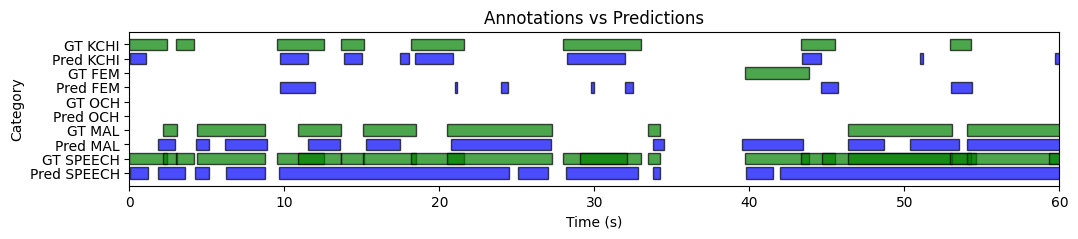

In [7]:
import matplotlib.pyplot as plt

example_annotation = annotations_output[annotations_output['audio_file_name'] == '672793']
example_prediction = vtc_share_predictions[vtc_share_predictions['audio_file_name'] == '672793']

# Set up the figure and axis
plt.figure(figsize=(12, 2))
ax = plt.gca()

ground_truth_fem = example_annotation[example_annotation['Voice_type'] == 'FEM']
ground_truth_mal = example_annotation[example_annotation['Voice_type'] == 'MAL']
ground_truth_kchi = example_annotation[example_annotation['Voice_type'] == 'KCHI']
ground_truth_och = example_annotation[example_annotation['Voice_type'] == 'OCH']
ground_truth_speech = example_annotation[example_annotation['Voice_type'] == 'SPEECH']
predictions_fem = example_prediction[example_prediction['Voice_type'] == 'FEM']
predictions_mal = example_prediction[example_prediction['Voice_type'] == 'MAL']
predictions_kchi = example_prediction[example_prediction['Voice_type'] == 'KCHI']
predictions_och = example_prediction[example_prediction['Voice_type'] == 'OCH']
predictions_speech = example_prediction[example_prediction['Voice_type'] == 'SPEECH']

# Define y-positions for the two bars
y_ground_truth_kchi = 9
y_predictions_kchi = 8

y_ground_truth_fem = 7
y_predictions_fem = 6

y_ground_truth_och = 5
y_predictions_och = 4 

y_ground_truth_mal = 3
y_predictions_mal = 2

y_ground_truth_speech = 1
y_predictions_speech = 0

# Plot predictions, excluding SPEECH
for idx, row in predictions_fem.iterrows():
    ax.barh(y_predictions_fem, row['Utterance_Duration'], left=row['Utterance_Start'], color='blue', edgecolor='black', alpha=0.7)

for idx, row in predictions_mal.iterrows():
    ax.barh(y_predictions_mal, row['Utterance_Duration'], left=row['Utterance_Start'], color='blue', edgecolor='black', alpha=0.7)

for idx, row in predictions_kchi.iterrows():
    ax.barh(y_predictions_kchi, row['Utterance_Duration'], left=row['Utterance_Start'], color='blue', edgecolor='black', alpha=0.7)

for idx, row in predictions_och.iterrows():
    ax.barh(y_predictions_och, row['Utterance_Duration'], left=row['Utterance_Start'], color='blue', edgecolor='black', alpha=0.7)

for idx, row in predictions_speech.iterrows():
    ax.barh(y_predictions_speech, row['Utterance_Duration'], left=row['Utterance_Start'], color='blue', edgecolor='black', alpha=0.7)
    
for idx, row in ground_truth_fem.iterrows():
    ax.barh(y_ground_truth_fem, row['Utterance_Duration'], left=row['Utterance_Start'], color='green', edgecolor='black', alpha=0.7)
    
for idx, row in ground_truth_mal.iterrows():
    ax.barh(y_ground_truth_mal, row['Utterance_Duration'], left=row['Utterance_Start'], color='green', edgecolor='black', alpha=0.7)

for idx, row in ground_truth_kchi.iterrows():
    ax.barh(y_ground_truth_kchi, row['Utterance_Duration'], left=row['Utterance_Start'], color='green', edgecolor='black', alpha=0.7)
    
for idx, row in ground_truth_och.iterrows():
    ax.barh(y_ground_truth_och, row['Utterance_Duration'], left=row['Utterance_Start'], color='green', edgecolor='black', alpha=0.7)
    
for idx, row in ground_truth_speech.iterrows():
    ax.barh(y_ground_truth_speech, row['Utterance_Duration'], left=row['Utterance_Start'], color='green', edgecolor='black', alpha=0.7)
    
    

# Adjust y-axis ticks and labels
ax.set_yticks([y_ground_truth_speech, y_predictions_speech, y_ground_truth_fem, y_predictions_fem, y_ground_truth_mal, y_predictions_mal, y_ground_truth_kchi, y_predictions_kchi, y_ground_truth_och, y_predictions_och])
ax.set_yticklabels(["GT SPEECH", "Pred SPEECH", "GT FEM", "Pred FEM", "GT MAL", "Pred MAL", "GT KCHI", "Pred KCHI", "GT OCH", "Pred OCH"])

# Add labels and titles
ax.set_xlabel("Time (s)")
ax.set_ylabel("Category")
ax.set_title("Annotations vs Predictions")
ax.set_xlim(0, 60)

## Compute Evaluation Metrics

In [13]:
pip install pyannote-metrics

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 170.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 150.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 135.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 88.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 136.0 MB/s eta 0:00:00
  Attempting uninstall: pyannote.core
    Found existing installation: pyannote.core 3.7.1
    Uninstalling pyannote.core-3.7.1:
      Successfully uninstalled pyannote.core-3.7.1
  Attempting uninstall: pyannote.database
    Found existing installation: pyannote.database 3.0.1
    Uninstalling pyannote.database-3.0.1:
      Successfully uninstalled pyannote.database-3.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following

In [ ]:
import pandas as pd
from pyannote.metrics.detection import DetectionPrecisionRecallFMeasure, DetectionErrorRate
from pyannote.core import Annotation, Segment

def dataframe_to_annotation(df, label_column="Voice_type"):
    """
    Converts a DataFrame to a pyannote.core.Annotation object.

    Parameters:
    - df (pd.DataFrame): Input DataFrame with 'Utterance_Start', 'Utterance_End', and a label column.
    - label_column (str): Column name for the labels (default: 'Voice_type').

    Returns:
    - Annotation: pyannote.core.Annotation object.
    """
    annotation = Annotation()
    for _, row in df.iterrows():
        start = float(row["Utterance_Start"])
        end = float(row["Utterance_End"])
        label = row[label_column]
        annotation[Segment(start, end)] = label
    return annotation

def compute_metrics(hypothesis_file_name: str,
                    reference_df_path: str='/home/nele_pauline_suffo/ProcessedData/annotations_superannotate/quantex_share_annotations.pkl',
    ):
    hypothesis_dir = Path('/home/nele_pauline_suffo/outputs/vtc/')
    hypothesis_path = hypothesis_dir / hypothesis_file_name
    # Load reference and hypothesis DataFrames
    reference_df = pd.read_pickle(reference_df_path)
    hypothesis_df = pd.read_pickle(hypothesis_path)

    # Get the list of audio files that have annotations
    annotated_files = reference_df['audio_file_name'].unique()
    # Filter the hypothesis DataFrame to only include these files
    predictions = hypothesis_df[hypothesis_df['audio_file_name'].isin(annotated_files)]
    
    voice_types = ['KCHI', 'OCH', 'FEM', 'MAL', 'SPEECH']
    class_metrics = {voice_type: {'precision': [], 'recall': [], 'f1_score': [], 'error_rate': []} for voice_type in voice_types}

    # Loop over each video
    for video in annotated_files:
        # Filter DataFrames for the current video
        reference_filtered = reference_df[reference_df['audio_file_name'] == video]
        predictions_filtered = predictions[predictions['audio_file_name'] == video]

        # Skip if there are no annotations for this video
        if reference_filtered.empty:
            print(f"No annotations available for video: {video}. Skipping.")
            continue

        # Convert to pyannote Annotations
        reference_annotation = dataframe_to_annotation(reference_filtered)
        hypothesis_annotation = dataframe_to_annotation(predictions_filtered)

        # Initialize metrics
        detection_f1 = DetectionPrecisionRecallFMeasure(collar=0, skip_overlap=False)
        detection_error_rate = DetectionErrorRate(collar=0, skip_overlap=False)

        # Compute the detection metrics
        detection_f1(reference_annotation, hypothesis_annotation)
        error_rate = detection_error_rate(reference_annotation, hypothesis_annotation)

        # Retrieve precision, recall, and F1 score
        precision, recall, f1_score = detection_f1.compute_metrics()

        # Now, compute metrics per class within this video
        for voice_type in voice_types:
            # Filter annotations for the current voice type
            ref_class_filtered = reference_filtered[reference_filtered['Voice_type'] == voice_type]
            hyp_class_filtered = predictions_filtered[predictions_filtered['Voice_type'] == voice_type]

            # Convert to pyannote Annotations
            reference_class_annotation = dataframe_to_annotation(ref_class_filtered)
            hypothesis_class_annotation = dataframe_to_annotation(hyp_class_filtered)

            # Initialize class-specific metrics
            detection_f1_class = DetectionPrecisionRecallFMeasure(collar=0, skip_overlap=False)
            error_rate_metric_class = DetectionErrorRate(collar=0, skip_overlap=False)

            # Compute the detection metrics for this class
            detection_f1_class(reference_class_annotation, hypothesis_class_annotation)
            error_rate_class = error_rate_metric_class(reference_class_annotation, hypothesis_class_annotation)

            # Retrieve precision, recall, and F1 score
            precision_class, recall_class, f1_score_class = detection_f1_class.compute_metrics()

            # Store the per-class results
            class_metrics[voice_type]['precision'].append(precision_class)
            class_metrics[voice_type]['recall'].append(recall_class)
            class_metrics[voice_type]['f1_score'].append(f1_score_class)
            class_metrics[voice_type]['error_rate'].append(error_rate_class)

    print("\nAveraged Metrics Per Class Over All Videos:")
    avg_f1_scores_per_class = []  # List to store avg F1 scores per class

    for voice_type in voice_types:
        precisions = class_metrics[voice_type]['precision']
        recalls = class_metrics[voice_type]['recall']
        f1_scores = class_metrics[voice_type]['f1_score']
        error_rates = class_metrics[voice_type]['error_rate']

        if precisions:
            avg_precision = sum(precisions) / len(precisions)
            avg_recall = sum(recalls) / len(recalls)
            avg_f1 = sum(f1_scores) / len(f1_scores)
            avg_error_rate = sum(error_rates) / len(error_rates)
        else:
            avg_precision = avg_recall = avg_f1 = avg_error_rate = 0

        avg_f1_scores_per_class.append(avg_f1)

        print(f"Class '{voice_type.upper()}':")
        print(f"  Precision: {avg_precision:.3f}")
        print(f"  Recall: {avg_recall:.3f}")
        print(f"  F1 Score: {avg_f1:.3f}")
        print(f"  Error Rate: {avg_error_rate:.3f}\n")
        
    # Calculate the final F1 score over all classes
    if avg_f1_scores_per_class:
        final_f1_score = sum(avg_f1_scores_per_class) / len(avg_f1_scores_per_class)
    else:
        final_f1_score = 0

    print(f"Final F1 Score over all classes: {final_f1_score:.3f}")

In [ ]:
compute_metrics(,


/home/nele_pauline_suffo/.conda/envs/pyannote/lib/python3.8/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(



Averaged Metrics Per Class Over All Videos:
Class 'KCHI':
  Precision: 0.778
  Recall: 0.532
  F1 Score: 0.595
  Error Rate: 0.723

Class 'OCH':
  Precision: 1.000
  Recall: 0.792
  F1 Score: 0.792
  Error Rate: 0.208

Class 'FEM':
  Precision: 0.324
  Recall: 0.650
  F1 Score: 0.335
  Error Rate: 6.784

Class 'MAL':
  Precision: 0.244
  Recall: 0.676
  F1 Score: 0.179
  Error Rate: 3.158

Class 'SPEECH':
  Precision: 0.779
  Recall: 0.692
  F1 Score: 0.688
  Error Rate: 1.810

Final F1 Score over all classes: 0.518


In [ ]:
compute_metrics('/home/nele_pauline_suffo/outputs/vtc/quantex_share_vtc_output_03.pkl')

In [23]:
compute_metrics('/home/nele_pauline_suffo/ProcessedData/annotations_superannotate/quantex_share_annotations.pkl',
                '/home/nele_pauline_suffo/outputs/vtc/quantex_share_vtc_output_20.pkl')

/home/nele_pauline_suffo/.conda/envs/pyannote/lib/python3.8/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(



Averaged Metrics Per Class Over All Videos:
Class 'KCHI':
  Precision: 1.000
  Recall: 0.000
  F1 Score: 0.000
  Error Rate: 1.000

Class 'OCH':
  Precision: 1.000
  Recall: 0.792
  F1 Score: 0.792
  Error Rate: 0.208

Class 'FEM':
  Precision: 1.000
  Recall: 0.160
  F1 Score: 0.160
  Error Rate: 0.840

Class 'MAL':
  Precision: 1.000
  Recall: 0.512
  F1 Score: 0.512
  Error Rate: 0.488

Class 'SPEECH':
  Precision: 1.000
  Recall: 0.000
  F1 Score: 0.000
  Error Rate: 1.000

Final F1 Score over all classes: 0.293
